<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/RawVsJPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install rawpy  ##tells collab that this is a cmd - whatever cmd , just prefix  !
import numpy as np 
import cv2 
import rawpy 
import imageio
from sklearn.linear_model import LinearRegression 
import os 
import math
import matplotlib.pyplot as plt 

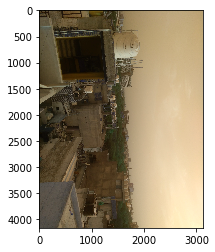

In [59]:
temp = os.listdir()
images=[]
name_jpg=[]
#loading .dng files 
for name in temp: 
  if(name.endswith('.dng')):
    images.append(name)
  if(name.endswith('.jpg')):
    name_jpg.append(name)
     
images_rgb=[]
#converting them into rgb files
for image in images:
  read = rawpy.imread(image)
  images_rgb.append(read.postprocess())
  
for image in name_jpg:
  read = cv2.imread(image)
  images_jpg.append(read) 
  
plt.imshow(images_jpg[0])

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
  #f, ax = plt.subplots(2, 1, figsize = (15, 15))
  #ax[0].imshow(imgrgb)
  #ax[1].imshow(sky)
  #ax[2].imshow(building)
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)
  
  


In [16]:
transmission(rgb,retMean = True)

0.5740106030886226

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      s += image[i][j]
  avg = s/float(image.size)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      ss += np.square((image[i][j] - avg))
  contr = np.sqrt(ss/float(image.size))
  return contr

In [24]:
contrast(rgb)

62.830787491607325

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
  return (-1 * ent[0])

In [55]:
print(transmission(images_rgb[0], retMean= True))


0.5740106030886226


In [60]:
print(transmission(images_jpg[0], retMean= True))

0.6556237609133888


In [62]:
contrast(images_rgb[0])


62.830787491607325

In [63]:
contrast(images_jpg[0])

65.96206164765877

In [64]:
entropy(images_rgb[0])


49.28406524658203

In [65]:
entropy(images_jpg[0])

51.80630874633789